In [15]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

from pathlib import Path
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


MAIN_DIR = Path(os.getcwd()).resolve().parent.parent
CHAPTER_ID = "ch_02"
GRAPH_ROOT_DIR = Path.joinpath(MAIN_DIR, "data", "graphs", CHAPTER_ID)
os.makedirs(GRAPH_ROOT_DIR, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = Path.joinpath(GRAPH_ROOT_DIR, fig_id + "." + fig_extension)
    print("Saving Figure : ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

DATASETS_DIR = Path.joinpath(MAIN_DIR, "data", "datasets")
HOUSING_DIR = Path.joinpath(DATASETS_DIR, "housing")
HOUSING_PATH = Path.joinpath(DATASETS_DIR, "housing", "housing.tgz")

def load_housing_data(housing_path=HOUSING_DIR):
    csv_path = Path.joinpath(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [16]:
housing = load_housing_data()
housing.head()

housing["median_house_value"]

mhv_dic = {}
for mhv in housing["median_house_value"]:
    mhv = int(mhv)
    if mhv in mhv_dic:
        mhv_dic[mhv] += 1
    else:
        mhv_dic[mhv] = 1

print("총 가지 수 : ", len(mhv_dic))
sorted_mhv = sorted(mhv_dic.items(), key=lambda x: x[1], reverse=True)
print(sorted_mhv)

for mhv in sorted_mhv[:20]:
    idx = mhv[0]
    housing.drop(housing[(housing['median_house_value'] == idx)].index, inplace=True)

housing.reset_index(drop=True, inplace=True)


총 가지 수 :  3842
[(500001, 965), (137500, 122), (162500, 117), (112500, 103), (187500, 93), (225000, 92), (350000, 79), (87500, 78), (275000, 65), (150000, 64), (175000, 63), (100000, 62), (125000, 56), (67500, 55), (250000, 47), (200000, 46), (118800, 39), (450000, 37), (156300, 35), (212500, 33), (193800, 31), (181300, 31), (75000, 30), (300000, 30), (93800, 29), (81300, 29), (55000, 29), (106300, 28), (143800, 28), (400000, 27), (500000, 27), (237500, 26), (262500, 25), (170800, 25), (166700, 23), (131300, 22), (140600, 22), (146900, 22), (90600, 22), (191700, 22), (168800, 22), (375000, 22), (325000, 22), (129200, 21), (108300, 21), (183300, 21), (158300, 21), (154200, 21), (104200, 20), (218800, 20), (166300, 20), (216700, 19), (71300, 19), (141700, 19), (206300, 19), (287500, 19), (165000, 19), (258300, 19), (179200, 18), (145800, 18), (103100, 18), (182100, 18), (95800, 18), (159400, 18), (147500, 17), (177500, 17), (243800, 17), (116700, 17), (84700, 17), (156900, 17), (153100, 1

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [18]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
18384,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
18385,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
18386,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
18387,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [19]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [20]:

corr = housing.drop("ocean_proximity", axis=1).corr()

In [21]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.665472
income_cat                  0.633131
rooms_per_household         0.145156
total_rooms                 0.143825
households                  0.092190
total_bedrooms              0.071285
housing_median_age          0.066168
population                  0.008347
longitude                  -0.044131
latitude                   -0.154894
population_per_household   -0.191359
bedrooms_per_room          -0.257692
Name: median_house_value, dtype: float64

In [22]:
sorted_corr = corr["median_house_value"].sort_values(ascending=False)

abs(sorted_corr.values)

array([1.        , 0.66547152, 0.63313075, 0.1451557 , 0.14382458,
       0.0921901 , 0.07128548, 0.06616844, 0.00834665, 0.04413123,
       0.15489424, 0.19135917, 0.25769234])

In [23]:
# sorted_corr = corr["median_house_value"].sort_values(ascending=False)
# for idx, val in zip(sorted_corr.index, sorted_corr.values):
#     if abs(val) < 0.2:
#         print(idx)
#         housing.drop(idx, axis=1, inplace=True)

In [24]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18384,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
18385,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
18386,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
18387,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


In [25]:
# 계층별 랜덤 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,  housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing_num = housing.drop("ocean_proximity", axis=1)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

58047.51278308392

In [29]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
1525,-122.25,38.03,15.0,3338.0,532.0,1834.0,520.0,5.6293,NEAR BAY,4,6.419231,0.159377,3.526923
1407,-122.08,37.89,39.0,3018.0,501.0,1223.0,489.0,6.2924,NEAR BAY,5,6.171779,0.166004,2.501022
12776,-117.10,32.71,9.0,1931.0,472.0,1628.0,445.0,2.0850,NEAR OCEAN,2,4.339326,0.244433,3.658427
5170,-118.31,34.19,27.0,4713.0,1169.0,2372.0,1077.0,3.7015,<1H OCEAN,3,4.376045,0.248037,2.202414
7525,-118.36,33.95,26.0,3231.0,1089.0,3193.0,1020.0,2.6535,<1H OCEAN,2,3.167647,0.337047,3.130392
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2,4.635659,0.245819,4.077519
13419,-116.99,32.72,15.0,825.0,130.0,334.0,131.0,4.0391,<1H OCEAN,3,6.297710,0.157576,2.549618
15850,-121.87,37.40,16.0,1767.0,268.0,1061.0,280.0,6.9584,<1H OCEAN,5,6.310714,0.151669,3.789286
16433,-122.01,36.97,35.0,1605.0,392.0,743.0,382.0,2.5368,NEAR OCEAN,2,4.201571,0.244237,1.945026


In [30]:
housing_prepared.shape

(14711, 17)

KeyError: 'median_house_value'

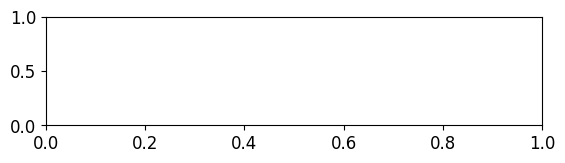

In [31]:
plt.subplot(3, 1, 1)
plt.hist(housing["median_house_value"])